In [33]:
%matplotlib inline
from matplotlib import pyplot as plt

%load_ext abjadext.ipython
from abjad import *

import numpy as np

from functools import partial, reduce
from fractions import Fraction

The abjadext.ipython extension is already loaded. To reload it, use:
  %reload_ext abjadext.ipython


In [3]:
def normalize(xs, a=0.0, b=1.0):
    return (b - a) * (xs - np.min(xs)) / (np.max(xs) - np.min(xs)) + a

def compose(*functions):
    return reduce(lambda g, f: lambda x: f(g(x)), functions, lambda x: x)

In [75]:
def fract(xs):
    new_xs = []
    
    for xi, xii in zip (xs[:-1], xs[1:]):
        new_xs += list(normalize(xs, xi, xii))
      
    return new_xs

In [76]:
xs = [-1., -.25, .25, 1.]
ys = [-1., .25, -.25, 1.]

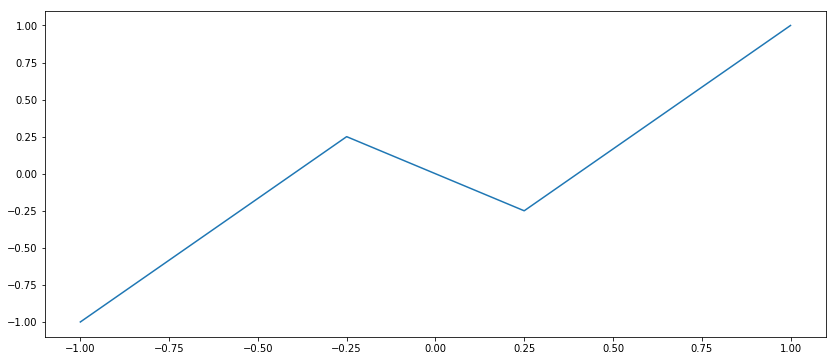

In [77]:
plt.figure(figsize=(14,6))
plt.plot(xs, ys)
plt.show()

In [78]:
mxs, mys = fract(xs), fract(ys)
mxs, mys = fract(mxs), fract(mys)

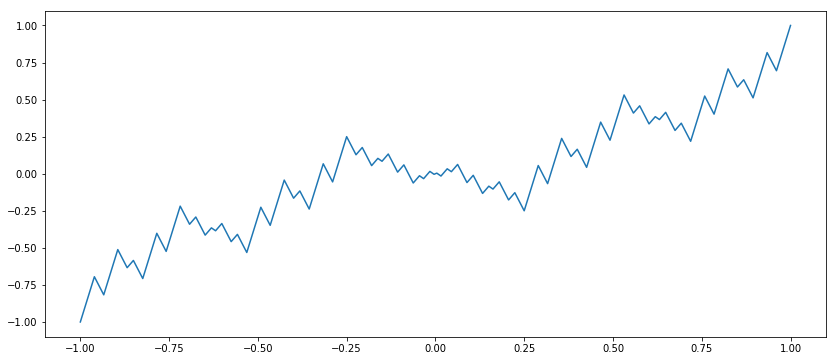

In [79]:
plt.figure(figsize=(14,6))
plt.plot(mxs, mys)
plt.show()

In [40]:
pitches = normalize(mys, -36., 36,)
durations = list(normalize(np.diff(mxs), 1/4, 1)) + [1.]
durations = [Fraction(d).limit_denominator(4) for d in durations]

notes = [Note(pitch, duration) for pitch, duration in zip(pitches, durations)]
staff_1 = Staff([n for n in notes if n.written_pitch >= 0])
staff_2 = Staff([n for n in notes if n.written_pitch < 0])
staff_group = StaffGroup([staff_1, staff_2])
leaf = inspect(staff_2).get_leaf(0)
attach(Clef('bass'), leaf)
show(staff_group)

AssignabilityError: not assignable duration: Duration(1, 3).

In [29]:
play(staff_group)

<audio controls type="audio/ogg" src="data:audio/ogg;base64,T2dnUwACAAAAAAAAAAChzUB3AAAAAPZFB80BHgF2b3JiaXMAAAAAAkSsAAD/////APQBAP////+4AU9nZ1MAAIAAAAAAAAAAoc1AdwEAAACOWen7FGH/////////////////////PDs6A3ZvcmJpcywAAABYaXBoLk9yZyBsaWJWb3JiaXMgSSAyMDE1MDEwNSAo4puE4puE4puE4puEKQEAAAAhAAAATE9DQVRJT049L3RtcC90bXB0d2U1MmVfXy9vdXQub2dnAQV2b3JiaXMpQkNWAQAIAACAIkwYxIDQkFUAABAAAKCsN5Z7yL333nuBqEcUe4i9995746xH0HqIuffee+69pxp7y7333nMgNGQVAAAEAIApCJpy4ELqvfceGeYRURoqx733HhmFiTCUGYU9ldpa6yGT3ELqPeceCA1ZBQAAAgBACCGEFFJIIYUUUkghhRRSSCmlmGKKKaaYYsoppxxzzDHHIIMOOuikk1BCCSmkUEoqqaSUUkot1lpz7r0H3XPvQfgghBBCCCGEEEIIIYQQQghCQ1YBACAAAARCCCFkEEIIIYQUUkghpphiyimngNCQVQAAIACAAAAAAEmRFMuxHM3RHM3xHM8RJVESJdEyLdNSNVMzPVVURdVUVVdVXV13bdV2bdWWbddWbdV2bdVWbVm2bdu2bdu2bdu2bdu2bdu2bSA0ZBUAIAEAoCM5kiMpkiIpkuM4kgSEhqwCAGQAAAQAoCiK4ziO5EiOJWmSZnmWZ4maqJma6KmeCoSGrAIAAAEABAAAAAAA4HiK53iOZ3mS53iOZ3map2mapmmapmmapmmapmmapmmapmmapmmapmmapmmapmmapmmapmmapmmapmlAaMgqAEACAEDHcRzHcRzHcRxHciQHCA1ZBQDIAAAIAEBSJMdyLEdzNMdzPEd0RMd0TMmUVMm1XAsIDVkFAAACAAgAAAAAAEATLEVTPMeTPM8TNc/TNM0TTVE0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TVMUgdCQVQAABAAAIZ1mlmqACDOQYSA0ZBUAgAAAABihCEMMCA1ZBQAABAAAiKHkIJrQmvPNOQ6a5aCpFJvTwYlUmye5qZibc84555xszhnjnHPOKcqZxaCZ0JpzzkkMmqWgmdCac855EpsHranSmnPOGeecDsYZYZxzzmnSmgep2Vibc85Z0JrmqLkUm3POiZSbJ7W5VJtzzjnnnHPOOeecc86pXpzOwTnhnHPOidqba7kJXZxzzvlknO7NCeGcc84555xzzjnnnHPOCUJDVgEAQAAABGHYGMadgiB9jgZiFCGmIZMedI8Ok6AxyCmkHo2ORkqpg1BSGSeldILQkFUAACAAAIQQUkghhRRSSCGFFFJIIYYYYoghp5xyCiqopJKKKsoos8wyyyyzzDLLrMPOOuuwwxBDDDG00kosNdVWY4215p5zrjlIa6W11lorpZRSSimlIDRkFQAAAgBAIGSQQQYZhRRSSCGGmHLKKaegggoIDVkFAAACAAgAAADwJM8RHdERHdERHdERHdERHc/xHFESJVESJdEyLVMzPVVUVVd2bVmXddu3hV3Ydd/Xfd/XjV8XhmVZlmVZlmVZlmVZlmVZlmUJQkNWAQAgAAAAQgghhBRSSCGFlGKMMcecg05CCYHQkFUAACAAgAAAAABHcRTHkRzJkSRLsiRN0izN8jRP8zTRE0VRNE1TFV3RFXXTFmVTNl3TNWXTVWXVdmXZtmVbt31Ztn3f933f933f933f933f13UgNGQVACABAKAjOZIiKZIiOY7jSJIEhIasAgBkAAAEAKAojuI4jiNJkiRZkiZ5lmeJmqmZnumpogqEhqwCAAABAAQAAAAAAKBoiqeYiqeIiueIjiiJlmmJmqq5omzKruu6ruu6ruu6ruu6ruu6ruu6ruu6ruu6ruu6ruu6ruu6ruu6QGjIKgBAAgBAR3IkR3IkRVIkRXIkBwgNWQUAyAAACADAMRxDUiTHsixN8zRP8zTREz3RMz1VdEUXCA1ZBQAAAgAIAAAAAADAkAxLsRzN0SRRUi3VUjXVUi1VVD1VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVXVNE3TNIHQkJUAABkAAMO05NJyz42gSCpHtdaSUeUkxRwaiqCCVnMNFTSISYshYgohJjGWDjqmnNQaUykZc1RzbCFUiEkNOqZSKQYtCEJDVggAoRkADscBJMsCJEsDAAAAAAAAAEnTAM3zAMvzAAAAAAAAAEDSNMDyNEDzPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJE0DNM8DNM8DAAAAAAAAAM3zAE8UAU8UAQAAAAAAAMDyPMATPcATRQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHE0DNM8DNM8DAAAAAAAAAMvzAE8UAc8TAQAAAAAAAEDzPMATRcATRQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAEOAAABFkKhISsCgDgBAIckQZIgSdA0gGRZ0DRoGkwTIFkWNA2aBtMEAAAAAAAAAAAAQPI0aBo0DaIIkDQPmgZNgygCAAAAAAAAAAAAIGkaNA2aBlEESJoGTYOmQRQBAAAAAAAAAAAA0EwToghRhGkCPNOEKEIUYZoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAgAEHAIAAE8pAoSErAoA4AQCHolgWAAA4kmNZAADgOJJlAQCAZVmiCAAAlqWJIgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAACAAQcAgAATykChISsBgCgAAIeiWBZwHMsCjmNZQJIsC2BZAM0DaBpAFAGAAACAAgcAgAAbNCUWByg0ZCUAEAUA4FAUy9I0UeQ4lqVposiRLEvTRJFlaZrnmSY0zfNMEaLneaYJz/M804RpiqKqAlE0TQEAAAUOAAABNmhKLA5QaMhKACAk

In [86]:
pitches = normalize(mys, -36., 36,)
durations = list(normalize(np.diff(xs), 1/16, 1)) + [1.]

In [87]:
durations = [Fraction(d).limit_denominator(16) for d in durations]

In [88]:
durations

[Fraction(1, 1), Fraction(1, 16), Fraction(1, 1), Fraction(1, 1)]

In [85]:
sum(durations)

Fraction(1001, 120)